# Análise de dados
### Introdução a análise de dados usando árvore de decisão.

In [7]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [9]:
from sklearn import tree
import pandas as pd

Usaremos árvore de decisão para classificar se dado objeto com peso e textura é laranja ou maçã.
Abaixo temos um exemplo bem simples de conjunto de treino 

onde temos para cada valor na matriz, o seguinte, o primeiro valor significa o peso da fruta o segundo se a fruta tem uma textura lisa, no caso da maçã, ou um textura irregular no caso da laranja, usaremos 1 para liso e 0 para irregular.

In [10]:
caracteristicas = [[140,1],[130,1],[150,0],[170,0]]

A coluna  referente ao peso é dada em gramas e a textura pode ser lisa denotada por 1 ou  irregular denotada por 0.

In [11]:
pd.DataFrame(caracteristicas,columns=['PESO','TEXTURA'])

,PESO,TEXTURA
0,140,1
1,130,1
2,150,0
3,170,0


nos rotulos usaremos 0 para representar a maçã e 1 para representar a laranja.

In [12]:
rotulos = [0,0,1,1]

Aqui, criamos um mapa apenas para retornar que classe aquele conjunto de característica mais se parece ao invés do número que representa essa classe

In [13]:
mapa = {0:'maçã',1:'laranja'} 

Aqui a gente tenta resolver o problema usando programação estruturada, aquele tipo de programação que utilizamos com mais frequencia, para assim podermos fazer uma simples comparação.

In [2]:
peso = 160
textura = 0

lisa = 0
irregular = 1

if textura == lisa:
    print ("maçã")
else:
    print ("Laranja")


maçã


Abaixo, instanciamos a árvore de decisão, As árvores de decisão funcionam da seguinte forma :  a cada conjuntos de características ela é direcionada para uma resposta, então é construida uma árvore a partir dos dados de treino e quando um dado novo aparece ele percorre essa árvore com as características novas encontrando uma possível solução certa.


In [14]:
classificador = tree.DecisionTreeClassifier()

Particionamento de atributos encontrando padrões nos dados, usando a arvore de decisão

In [15]:
classificador = classificador.fit(caracteristicas, rotulos)

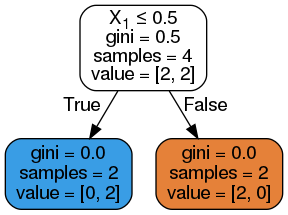

In [16]:
dot_data = StringIO()
export_graphviz(classificador, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Classificando o objeto de peso 160g  e textura lisa.

In [17]:
predicao = classificador.predict([[160,0]])

In [18]:
print(predicao)

[1]


In [19]:
print (mapa[predicao[0]])

laranja


##### Notebooks baseados no repositório do seguinte link: https://github.com/machine-learning-projects/machine-learning-recipes